# Introduction to the data
We will be work with data from the sinking of the RMS Titanic which is one of the most infamous shipwrecks in history. The dataset represents 891 passengers on the Titanic and some information about them.
We've selected the columns from the dataset, which are: 
```
PassengerId : A numerical id assigned to each passenger
Survived    : Whether the passenger survived (1), or didn't (0)
Pclass      : The class the passenger was in
Name        : The name of the passenger
Sex         : The gender of the passenger is male or female
Age         : The age of the passenger Fractional
SibSp       : The number of siblings and spouses the passenger had on board
Parch       : The number of parents and children the passenger had on board
Ticket      : The ticket number of the passenger
Fare        : How much the passenger paid for the ticket
Cabin       : Which cabin the passenger was in
Embarked    : Where the passenger boarded the Titanic
```

# Questions
>- Is the chance of survival for the passengers influenced by Pclass?
>- Is the chance of survival for the passengers influenced by Gender?
>- Is the chance of survival for the passengers influenced by Age?
>- Is the chance of survival for the passengers influenced by the number of family members?
>- Is the "children and women first" rule actually right?
>- What factors made people more likely to survive?   

# Data Wrangling

Let's import the CSV to the Pandas and sumarize the dataset 

In [1]:
from __future__ import print_function
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_titanic = pd.read_csv('titanic-data.csv')
df_titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Cleaning Data

In [3]:
# Count the missing values 
def count_missing_values(column):
    return len(column[pd.isnull(column) == True])
df_titanic.apply(lambda col: len(col[pd.isnull(col) == True]))

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Based on questions posed, 'Name', 'PassengerId', and 'Ticket' seem to be non-informative columns. 
Check missing values in the dataset, we can see there is a lot of missing 'Cabin' values. 
So, we will drop 'PassengerId', 'Name', 'Cabin', and 'Ticket' column.  
And then I'll remove any missing values.

In [4]:
df_titanic = (df_titanic.drop(['PassengerId', 'Name', 'Cabin', 'Ticket'], axis=1)
                       .dropna(axis=0))

# Exploration

In [5]:
# Define color for visualization
color_survived = sns.xkcd_palette(['light red', 'light blue'])
color_person = sns.xkcd_palette(['blue', 'red', 'green'])

### 1. Is the chance of survival for the passengers influenced by Pclass?
Let's visualize the number of passengers who survived and died grouped by Pclass.  
And compute the survival probability of each Pclass.

Pclass
1    0.652174
2    0.479769
3    0.239437
Name: Survived, dtype: float64

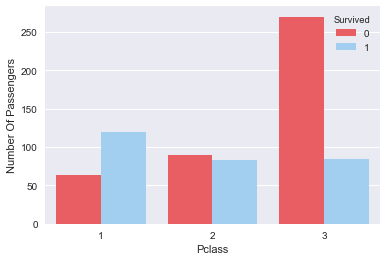

In [6]:
(sns.countplot(x='Pclass', hue='Survived', 
               data=df_titanic, palette = color_survived)
    .set(ylabel='Number Of Passengers'))
df_titanic.groupby('Pclass')['Survived'].mean()

The total of passengers on the third class are overwhelmingly, but the survival rate of the third class is the lowest.  
The survival rate of a first class passenger is the highest, and so much higher than the others.  

### 2. Is the chance of survival for the passengers influenced by Gender?
Let's visualize the number of passengers who survived and died grouped by Sex.  
And compute the survival probability of Male and Female.

Sex
female    0.752896
male      0.205298
Name: Survived, dtype: float64

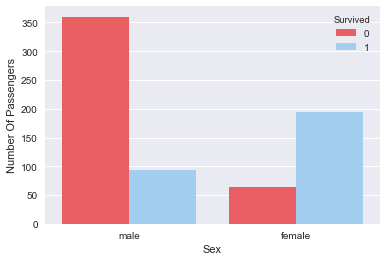

In [7]:
(sns.countplot(x='Sex', hue='Survived', 
               data=df_titanic, palette = color_survived)
    .set(ylabel='Number Of Passengers'))
df_titanic.groupby('Sex')['Survived'].mean()

Look at the plot and numbers, it seems to me that women had the higher chances of survival than men many times.

### 3. Is the chance of survival for the passengers influenced by Age?
Let's visualize the differences in age distributions between passengers who survived and died.

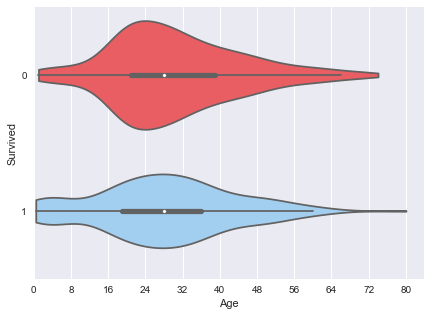

In [8]:
plt.figure(figsize=(7, 5))
(sns.violinplot(x='Age', y='Survived', orient = 'h', order = [ 0, 1],cut=0.0, scale = 'count',
               data=df_titanic, palette = color_survived)
    .set(xlabel = 'Age', ylabel='Survived',
         xlim=(0, None), xticks =np.arange(0, 84, 8))
)
plt.show()

I can see from the violin plot little different the distribution of Age by Survived.  
Survival has thinner distribution and higher peak, but wider in the earlier statistics.  
It seems that children had the high chances of survival and adults didn't that.

### 4. Is the chance of survival for the passengers influenced by the number of family members?

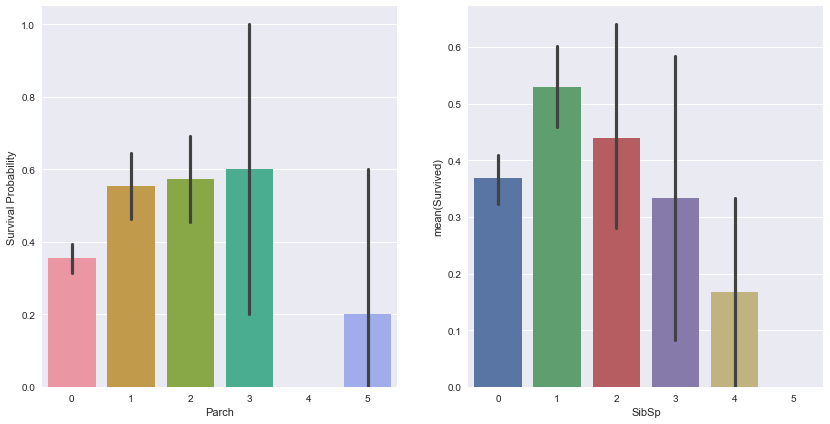

In [9]:
f, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(14, 7), sharex=True)
(sns.barplot(x='Parch', y='Survived', 
            data=df_titanic, ax = ax1)
    .set(ylabel="Survival Probability"))
sns.barplot(x='SibSp', y='Survived', 
            data=df_titanic, ax = ax2)
plt.show()

Same conclusion for two plots: passengers who traveled with fewer family members have the higher chance of survival.  
Now I’ll add 'FamilySize' column to define the total of family members ('SibSp' and 'Parch') the passenger had on board and visualize the survival probability of passengers grouped by FamilySize

FamilySize
0    0.318408
1    0.546763
2    0.569892
3    0.777778
4    0.272727
5    0.136364
6    0.333333
7    0.000000
Name: Survived, dtype: float64

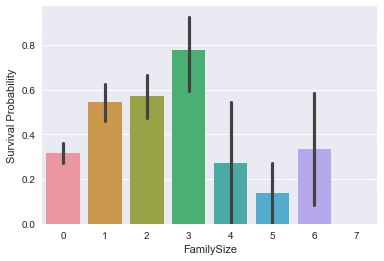

In [10]:
df_titanic = df_titanic.assign(FamilySize = lambda p : p['SibSp'] + p['Parch'])
(sns.barplot(x='FamilySize', y='Survived', data=df_titanic)
    .set(ylabel='Survival Probability'))
df_titanic.groupby('FamilySize')['Survived'].mean()

We can see the passengers had the number of family members between 1 and 3 have the higher chance of survival.
Besides, passengers traveled alone have the low chance of survival.

### 5. Is the "children and women first" rule actually right?

I’ll add 'Person' column to define Male, Female, Child (who are less than 16).  
Visualize the survival probability of passengers grouped by Child, Female, Male.

Person
child     0.590361
female    0.773148
male      0.174334
Name: Survived, dtype: float64

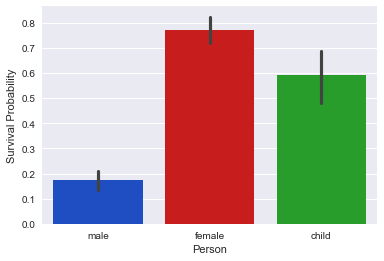

In [11]:
df_titanic = df_titanic.assign(Person = lambda p : np.where(p['Age']>=16, p.Sex, 'child'))

(sns.barplot(x='Person', y='Survived', data=df_titanic, 
            palette = color_person)
 .set(ylabel='Survival Probability'))
df_titanic.groupby('Person')['Survived'].mean()

We can see women had the highest survival rate and men had the lowest survival rate. Meanwhile, children had the medium survival rate, not high like the survival rate of women.  
But let's remember the first question, the survival rate is affected by class, so the survival rate of children is not high because of the low survival rate of any class.  

Now, let's visualize the survival probability of passengers grouped by Person and Pclass.

Pclass,1,2,3
Person,,,
child,0.833333,1.000000,0.431034
female,0.975000,0.906250,0.430556
male,0.377551,0.066667,0.128889


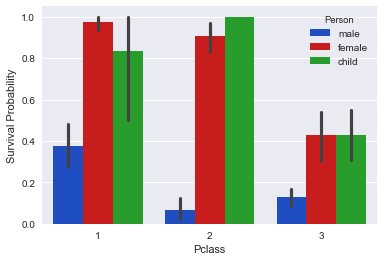

In [12]:
(sns.barplot(x = 'Pclass', hue='Person', y='Survived', data=df_titanic, 
            palette = color_person)
 .set(ylabel='Survival Probability'))
df_titanic.groupby(['Pclass', 'Person'])['Survived'].mean().unstack(0)

The survival rates of women and children on first class and second class are very high (all above than 80%, even approximately 90% or 100%).  
Besides, the survival rates of women and children on third class are much lower (about 43%).  
But comparing them to the survival rates of women on the same class (just about 13%), we can see the survival rates of women and children are very high.  
Now I can answer that 'children and women first' rule is actually right.

### 6. What factors made people more likely to survive?   
I just analyze some factors like Person, and Pclass, FamilySize.

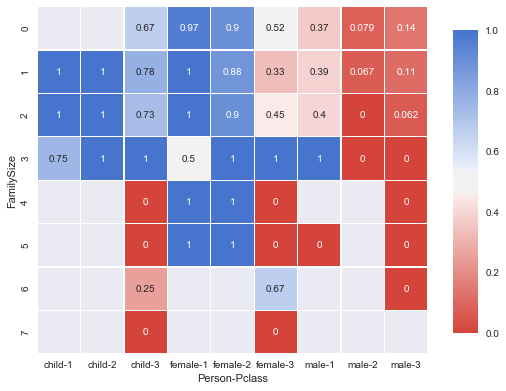

In [13]:
cmap = sns.diverging_palette(14, 256, sep=20, as_cmap=True)

fig, ax = plt.subplots(1, 1, figsize=(7, 7))
cbar_ax = fig.add_axes([.95, 0.2, .05, 0.6])
((df_titanic.pivot_table( index='FamilySize', columns=['Person', 'Pclass'], values = 'Survived', aggfunc = np.mean))
 .pipe((sns.heatmap, 'data'), linewidths=0.1, annot=True, ax=ax, cmap = cmap, square = True, cbar_ax = cbar_ax, cbar = True))
plt.show()

 Let’s take a look at the relationship between Person, Pclass, FamilySize and the survival rate of passengers on the heat map diagram. We can see some points:  
 - I said that the passengers traveling alone didn't have a high chance of survival on the fourth question.  But here,  the survival rates of the alone passenger who are either children or women are  high(the survival rates of women who were in first class and second class are above 90%, even the survival rates of women and child were in third class are above 50%).  However,  the survival rates of the alone passenger who are men are very low, especially in the second class and the third class (below 10%).
 - Based on the above question, we know the chances of survival for children and women in the third class are not high. With this plot, we can investigate that the survival rate of children who had fewer than 4 family members is really high, and the survival rate of both children and women more than 3 family members is very low (except the case with six family members, other cases passengers didn't have any chance of survival).
 - The survival rate of men is very low for the first class( except the case with three family members, all of them survived). And the survival rates of men are extremely low and decrease to zero by the increment of the family size quickly for the second class and the third class. We can also observe that alone man have the higher chance of survival than other men in the same class (so even getting the highest rate in the second and third class).


## Conclusion

>1. There is the obvious difference - even contradictions - among the survival rates of child, women, and men. Women and children had much higher chance of survival than men on the Titanic
>3. Similarly, the class of a passenger influenced the chance of survival as well. In general, the first class did better than the third one. 
>4. Based on the class, there is a striking contrast among the survival rates of children, women, and men in the second class, which of children and women is nearly one, but almost the men died (the survival rate is about 6.7%)
>4. In the whole, the alone passengers had lower survival rate than passengers traveled with family. In the group passenger by Person feature, women and children traveling alone had more chances of survival than traveling with more than three family members.  
>Especially, in the second and third class, where had the extremely low survival rate of men,  the survival rate of men traveling alone is also higher than with family. In the additional, having more than one family members for the second class or more than two family members for the third class, the men died all. 